In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
pwd

'C:\\Users\\Owner'

In [4]:
data = pd.read_csv(r"C:\\Users\\Owner\Desktop\NVDA.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,34.119999,34.250000,32.560001,33.009998,30.358782,12099100
1,2008-01-03,33.200001,33.860001,32.630001,32.750000,30.119659,11882700
2,2008-01-04,31.770000,31.930000,29.799999,30.000000,27.590534,18402300
3,2008-01-07,30.200001,30.450001,26.350000,26.900000,24.739513,25170000
4,2008-01-08,27.049999,29.290001,26.420000,27.469999,25.263729,27673900
...,...,...,...,...,...,...,...
3015,2019-12-23,240.520004,241.809998,238.389999,238.820007,238.497025,8876500
3016,2019-12-24,238.199997,239.309998,236.820007,238.619995,238.297287,3471600
3017,2019-12-26,238.759995,240.320007,238.000000,239.190002,238.866516,4571300
3018,2019-12-27,239.800003,240.339996,235.809998,236.869995,236.549637,6366100


In [5]:
data_training = data[data['Date'] < '2019-05-05'].copy()
data_testing = data[data['Date'] >= '2019-05-05'].copy()

In [6]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [7]:
data_training.shape

(2854, 5)

In [8]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.09925172, 0.09731825, 0.09580818, 0.09563959, 0.1201771 ],
       [0.09600452, 0.09595642, 0.09605833, 0.09472236, 0.11780382],
       [0.09095722, 0.08921712, 0.08594504, 0.08502082, 0.1893047 ],
       ...,
       [0.62512352, 0.62305326, 0.62434341, 0.61585412, 0.08462078],
       [0.61718197, 0.62326276, 0.61955474, 0.62544984, 0.09569861],
       [0.62660594, 0.6199804 , 0.62459353, 0.6248148 , 0.07983475]])

In [53]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training[i-100:i])
    y_train.append(data_training[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [54]:
x_train.shape

(2754, 100, 5)

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [57]:
regressor = Sequential()

regressor.add(LSTM(units = 70, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 110, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [58]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 70)           21280     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 70)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 90)           57960     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 90)           0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 110)          88440     
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 110)          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [59]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
87/87 [==============================] - 27s 310ms/step - loss: 0.0087
Epoch 2/150
87/87 [==============================] - 29s 335ms/step - loss: 0.0036
Epoch 3/150
87/87 [==============================] - 35s 405ms/step - loss: 0.0019
Epoch 4/150
87/87 [==============================] - 28s 319ms/step - loss: 0.0016
Epoch 5/150
87/87 [==============================] - 26s 301ms/step - loss: 0.0014
Epoch 6/150
87/87 [==============================] - 26s 301ms/step - loss: 0.0020
Epoch 7/150
87/87 [==============================] - 26s 301ms/step - loss: 0.0016
Epoch 8/150
87/87 [==============================] - 27s 305ms/step - loss: 0.0011
Epoch 9/150
87/87 [==============================] - 27s 306ms/step - loss: 0.0013
Epoch 10/150
87/87 [==============================] - 26s 301ms/step - loss: 0.0014
Epoch 11/150
87/87 [==============================] - 26s 300ms/step - loss: 0.0013
Epoch 12/150
87/87 [==============================] - 27s 305ms/step - loss: 0.0012
E

In [60]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2854,2019-05-06,175.500000,180.339996,174.000000,179.850006,179.092438,10554400
2855,2019-05-07,177.899994,177.899994,171.169998,173.110001,172.380814,13880500
2856,2019-05-08,172.000000,177.149994,171.520004,173.919998,173.187408,10479200
2857,2019-05-09,171.139999,171.529999,165.399994,170.190002,169.473129,16506200
2858,2019-05-10,168.949997,171.589996,164.000000,168.820007,168.108902,14237500


In [61]:
past_60_days = data_testing.tail(60)

In [62]:
df = past_60_days.append(data_testing, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,181.399994,183.149994,178.779999,181.970001,6638100
1,184.580002,188.339996,184.229996,184.330002,12024600
2,180.639999,180.639999,176.500000,177.229996,11110900
3,180.320007,182.699997,179.160004,180.710007,7310300
4,180.619995,185.080002,180.410004,183.029999,7728100


In [63]:
inputs = scaler.transform(df)
inputs

array([[0.61908792, 0.61725675, 0.61833973, 0.62114588, 0.06028596],
       [0.63031201, 0.63537953, 0.63781583, 0.62947157, 0.11936005],
       [0.61640546, 0.60849219, 0.61019193, 0.60442392, 0.10933944],
       ...,
       [0.82154451, 0.81688665, 0.82996823, 0.82300859, 0.03761923],
       [0.82521529, 0.81695645, 0.82214205, 0.81482399, 0.05730291],
       [0.81176761, 0.80250014, 0.80516745, 0.79877238, 0.0582384 ]])

In [64]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])
    
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test.shape, y_test.shape

((166, 60, 5), (166,))

In [65]:
x_test.shape

(166, 60, 5)

In [66]:
y_pred = regressor.predict(x_test)

In [67]:
scaler.scale_

array([3.52957778e-03, 3.49186384e-03, 3.57359842e-03, 3.52783480e-03,
       1.09670648e-08])

In [68]:
scale = 1 / 3.52957778e-03
scale

283.3200066213019

In [69]:
y_pred = y_pred * scale 
y_test = y_test * scale

In [48]:
y_pred.shape

(166, 1)

In [70]:
y_test.shape

(166,)

In [76]:
y_pred[136:]

array([[192.80496],
       [189.61253],
       [188.58626],
       [189.09605],
       [190.40938],
       [192.13104],
       [193.75865],
       [196.18504],
       [198.58754],
       [200.70076],
       [202.03435],
       [200.67488],
       [196.59172],
       [194.37526],
       [193.79585],
       [194.5704 ],
       [195.78572],
       [197.18759],
       [198.85663],
       [200.8991 ],
       [203.57158],
       [206.26064],
       [208.6404 ],
       [210.94067],
       [213.29312],
       [216.21465],
       [219.0638 ],
       [221.25194],
       [222.88405],
       [223.20625]], dtype=float32)

In [77]:
y_test[136:]

array([203.69999673, 197.88999874, 205.02999873, 201.07000673,
       204.99999973, 205.08999573, 210.03999272, 214.49999971,
       212.66999772, 210.99999972, 210.46000672, 195.86999474,
       205.02000373, 204.30000273, 205.52000373, 205.24999973,
       207.38000472, 208.39999372, 210.17999272, 218.19000171,
       219.89999371, 219.89999371, 223.6900017 , 224.8999937 ,
       232.13000469, 234.52000369, 232.19999669, 232.75999469,
       233.80000269, 229.99000469])

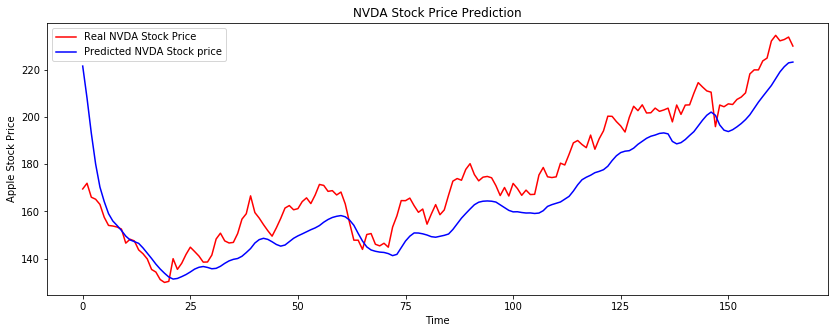

In [78]:
plt.figure(figsize = (14,5))
plt.plot(y_test, color = 'red', label = 'Real NVDA Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted NVDA Stock price')
plt.title('NVDA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()